<a href="https://colab.research.google.com/github/Baasty-OCh/Miner-a-curso-/blob/Labs/ProyectoMineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 1
Integrantes:
Bastián Olguín - Benjamín Indo - Javiera Valenzuela - Vicente Muñoz

# **1. Introducción (problema y motivación)**
**Contexto general del problema y el conjunto de datos**

Este conjunto de datos, titulado "Student Performance & Behavior Dataset", contiene información real de 5,000 estudiantes recopilada por un proveedor privado de educación. Incluye atributos clave relacionados con el rendimiento académico y el comportamiento de los estudiantes, como asistencia, calificaciones en exámenes, participación en actividades extracurriculares, nivel educativo de los padres, nivel de estrés, entre otros.

**¿Por qué es interesante analizar estos datos?**

Analizar este conjunto de datos es valioso porque permite explorar cómo diversos factores personales, académicos y socioeconómicos influyen en el rendimiento estudiantil. Esto puede ayudar a identificar patrones y relaciones que informen estrategias educativas, intervenciones personalizadas y políticas para mejorar los resultados académicos y el bienestar de los estudiantes.


# **2. Exploración de datos (estadísticas, patrones iniciales)**

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download(r"mahmoudelhemaly/students-grading-dataset")
# Guardamos la ruta
csv = os.path.join(path, 'Students_Grading_Dataset_Biased.csv')
# Cargamos el csv con pd
df = pd.read_csv(csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

Tipos de datos que contiene el dataset:

*   Demográficos: Student_ID, First_Name, Last_Name, Email, Gender, Age, Department.
*   Académicos: Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Total_Score, Grade.
*   Hábitos y comportamiento: Study_Hours_per_Week, Extracurricular_Activities, Internet_Access_at_Home, Parent_Education_Level, Family_Income_Level, Stress_Level, Sleep_Hours_per_Night.



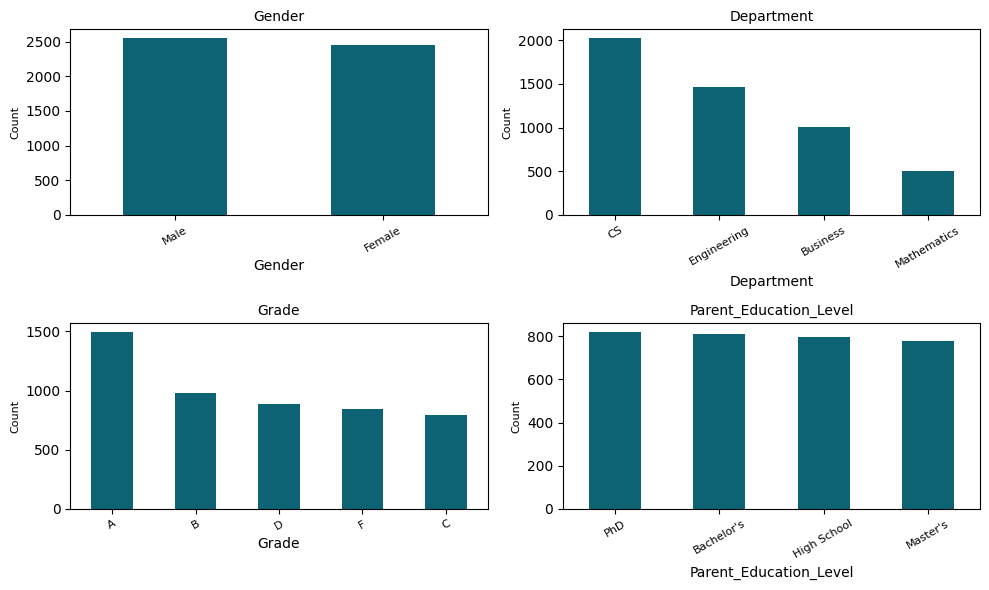

In [ ]:
import matplotlib.pyplot as plt
categories = ['Gender', 'Department', 'Grade', 'Parent_Education_Level']
n_cols = 2
n_rows = (len(categories) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(categories):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='#0d6374')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
for j in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
# Algunos datos importantes del dataset
shape = df.shape
print(f"El dataset tiene {shape[0]} filas y {shape[1]} columnas")

El dataset tiene 5000 filas y 23 columnas


In [ ]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [ ]:
nulls = df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)

,0
Parent_Education_Level,1794
Assignments_Avg,517
Attendance (%),516


# **3. Preguntas y problemas (formulación de preguntas y posibles hipótesis)**

## Preguntas tentativas
1. ¿Se puede predecir la nota final de los alumnos en base a la asistencia, nota de tareas, nota de quizzes, nota de participación, horas de estudio por semana y horas de sueño por noche?**[Aprendizaje supervisado (regresión)]**

  Esta pregunta es clave para entender cómo los hábitos académicos y de vida cotidiana impactan directamente en el rendimiento de los estudiantes. Identificar relaciones claras entre estas variables y la nota final permitiría optimizar métodos de estudio y mejorar el rendimiento general con recomendaciones prácticas.
2. ¿Es posible predecir la calificación final (Grade) de un estudiante en función de sus hábitos de estudio, asistencia, participación en actividades extracurriculares y factores socioeconómicos? **[Aprendizaje supervisado (clasificación)]**

  Analizar esta relación permite comprender el efecto combinado de elementos académicos y del entorno personal en el desempeño de los estudiantes.
  Esta información puede ser muy útil para diseñar políticas de apoyo más efectivas, especialmente para alumnos en condiciones desfavorables.

  Esta pregunta es parecida a la anterior pero aquí lo que se busca predecir es la calificación final, que es una es categórica marcada en letras (A-B-C-D-E-F)
3.¿Existen grupos de estudiantes con comportamientos y rendimientos académicos similares? **[Aprendizaje No supervisado (clustering)]**

  Identificar grupos con patrones comunes en su rendimiento y comportamiento ayuda a personalizar estrategias educativas, crear programas específicos para distintos perfiles estudiantiles y mejorar la gestión del aprendizaje a nivel institucional.


# **4. Propuesta experimental (estrategia metodológica)**

## Estrategia Metodológica
### ANTES DE TODO: Preprocesamiento de Datos
Antes de aplicar cualquier modelo, es esencial realizar un proceso de **limpieza de datos**. Esto incluye la gestión de valores faltantes y la trasnformación adecuada de variables según sea necesario. Además, es importante **escalar los datos** para evitar problemas de rendimiento en los modelos.

###1. Predicción de Notas Finales
Para predecir las **notas finales** de los estudiantes, utilizando factores como la asistencia, nota de tareas, nota de quizzes, nota de participación, horas de estudio por semana y horas de sueño por noche, se utilizarán modelos de **aprendizaje supervisado**. Los modelos seleccionados son:

- **Regresión Lineal**: Para modelar la relación lineal entre las variables independientes y la nota final.
- **Random Forest**: Para capturar las relaciones no lineales.

La evaluación de estos modelos se realizará mediante las siguientes métricas:

- **RMSE**: Para medir la diferencia entre los valores predichos y los reales.
- **R²**: Para evaluar el porcentaje de variabilidad explicada por el modelo.

###2. Predicción de Calificación Final
Para predecir la **calificación final** (A-B-C-D-E-F), se utilizarán modelos de clasificación ya que la variable objetivo es categórica. Los modelos a utilizar serán los siguientes:
-**Árboles de decisión**: Para ver qué reglas siguen los atributos que determinan la calificación
- **Random Forest**
- **Support Vector Machine (SVM)**
Las métricas de evaluación para estos modelos serán:
- **Acuracy**: Para medir el porcentaje de predicciones correctas.
- **Precision**: Para evaluar la precisión de la clasificación.
- **Recall**: Para medir el porcentaje de casos positivos detectados.

###3. Identificación de Grupos de Estudiantes
Para encontrar **grupos de estudiantes** con comportamientos y rendimientos académicos similares, se utilizaran técnicas de **aprendizaje no supervisado** (clustering) :
- **K-means**: Algoritmo de clustering que agrupa a los estudiantes en k-grupos basados en la similitud de sus características
- **DBSCAN**: Algoritmo basado en densidad que identifica clusters de estudiantes en áreas donde hay mayor concentración de datos.


# **5. Experimento preliminar (implementación)**

In [ ]:
# Pregunta 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
df_standar = df.copy()
# Definir las columnas numéricas para escalar
numerical_cols = ['Attendance (%)', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
                  'Study_Hours_per_Week', 'Stress_Level (1-10)']

# Rellenar los valores nulos con la media de cada columna
df_standar[numerical_cols] = df_standar[numerical_cols].fillna(df_standar[numerical_cols].mean())
# Crear una instancia de StandardScaler
scaler = StandardScaler()
# Ajustar el scaler a las variables numéricas y transformarlas
df_standar[numerical_cols] = scaler.fit_transform(df_standar[numerical_cols])
X = df_standar[numerical_cols]
y = df_standar['Final_Score']  # Asegúrate de que la columna 'Final_Score' esté presente
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Inicializar el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calcular RMSE manualmente
r2 = r2_score(y_test, y_pred)  # R² Score
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(numerical_cols, model.coef_):
    print(f"{feature}: {coef}")

Root Mean Squared Error (RMSE): 17.277636861309325
R² Score: -0.0037099532997990625

Coeficientes del modelo:
Attendance (%): -0.24440947903577148
Assignments_Avg: -0.15627149396845028
Quizzes_Avg: -0.051057419594342464
Participation_Score: -0.07412726161207622
Study_Hours_per_Week: 0.23321639525168486
Stress_Level (1-10): -0.019997849274130564


# **6. Análisis de resultados y discusión**

Es curioso el resultado preliminar de este experimento, ya que se obtiene en primer lugar valores muy pequeño para cada categoria, lo cual indica que en realidad hay poca variabilidad en el resultado (final score) con respecto al nivel de el parametro.
En particular es llamativo como a el modelo sugiere que, a menor asistencia a clases mejores calificaciones se tienen.

Por otro lado como el R^2 es tan cercano a cero (de hecho negativo) por ende menor a este valor, podemos afirmar que el rendimiento del modelo es peor incluso que solo haber sacado los promedios de las categorias y pronosticar en base a eso.

En busca de una explicación al porqué el modelo de regresión lineal tuvo tan mal desempeño, graficamos la asistencia vs el final score.
Para toda la muestra y luego segmentado por departamentos. (CS, Engineering, Mathematics and Business)

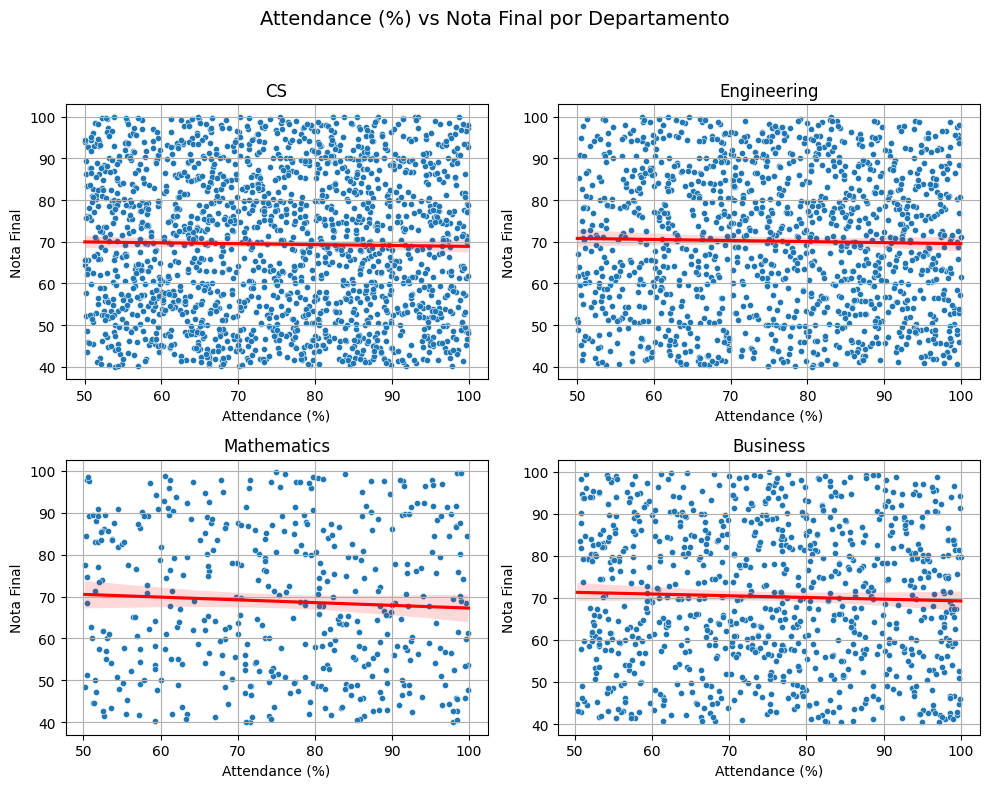

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la variable que queremos graficar
col = 'Attendance (%)'

# Crear una copia del DataFrame y agregar Final_Score
df_plot = df.copy()
df_plot['Final_Score'] = y

# Lista de departamentos
departamentos = ['CS', 'Engineering', 'Mathematics', 'Business']

# Crear figura general con 2 filas × 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # tamaño total ajustable
fig.suptitle(f'{col} vs Nota Final por Departamento', fontsize=14)
axes = axes.flatten()

# Graficar en cada subplot
for i, dept in enumerate(departamentos):
    df_dept = df_plot[df_plot['Department'] == dept]
    ax = axes[i]

    sns.scatterplot(x=col, y='Final_Score', data=df_dept, ax=ax, s=20)
    sns.regplot(x=col, y='Final_Score', data=df_dept, scatter=False,
                line_kws={"color": "red"}, ax=ax)

    ax.set_title(f'{dept}')
    ax.set_xlabel(col)
    ax.set_ylabel('Nota Final')
    ax.grid(True)

# Ajustar espaciado general
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Aquí podemos ver como la tendencia, salvo en el caso del departamento de Matematicas (aunque igual es muy tenue) es casi inexistente, esto explica a priori el por qué la regresion tuvo tan mal resultado como modelo predictor, por que en esencia los datos no siguen aquella tendencia.

La propuesta ahora para poder mejorar el desempeño del modelo, sería 'linealizar' los datos, combinando categorías entre sí, en busca de que unidas de manera estrategica si nos permitan encontrar una tendencia, con la cual entrenar al modelo y así finalmente usarlo para predecir de manera mas fiable.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Columnas de hábitos y salud
cols_numericas = ['Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

# Calificaciones a analizar
grades = ['A', 'B', 'C', 'D']

# Iterar sobre cada calificación
for grade in grades:
    print(f"\n📚 Procesando calificación: {grade}")

    # Filtrar datos: mujeres, calificación específica, matemáticas
    df_filtered = df[
        (df['Gender'] == 'Female') &
        (df['Grade'] == grade) &
        (df['Department'] == 'Mathematics')
    ]

    # Quitar filas con NaNs
    X = df_filtered[cols_numericas].dropna()
    if len(X) < 10:
        print(f"❌ No hay suficientes datos para calificación {grade} (solo {len(X)} filas). Saltando...")
        continue

    # Escalado
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Probar distintos valores de k
    silhouette_scores = []
    models = []
    K_range = range(2, 11)

    for k in K_range:
        model = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
        models.append((model, labels))

    # Elegir mejor modelo
    best_k = K_range[np.argmax(silhouette_scores)]
    best_model, best_labels = models[np.argmax(silhouette_scores)]

    print(f"✔️ Mejor k para {grade}: {best_k}")
    print(f"✔️ Silhouette Score óptimo: {max(silhouette_scores):.3f}")

    # Asignar clusters al dataframe original
    df_sin_na = df_filtered.loc[X.index].copy()
    df_sin_na['Cluster'] = best_labels

    # Pairplot de hábitos
    sns.pairplot(df_sin_na, hue='Cluster', vars=cols_numericas, palette='Set2')
    plt.suptitle(f'Clusters para mujeres con calificación {grade}', y=1.02)
    plt.tight_layout()
    plt.show()

    # Gráfico del silhouette score
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
    plt.title(f"Silhouette Score vs Número de Clusters (Grade {grade})")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(K_range)
    plt.grid(True)
    plt.show()
